# Preliminary Data Report

## Data Exploration

This dataset has two tables that will be analysed. The first is the movie table, which includes the attributes of movies
from the IMDB website. The second is the ratings table, which includes the ratings given to various movies by users of
the website MovieLens.

Below is a sample of the movies table.

In [44]:
import pickle
import bz2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_in_pickle(filename):
    bz2_file = bz2.BZ2File(filename, "r")
    data = pickle.load(bz2_file)
    return data

movie_df = read_in_pickle("../pickles/organised_movies.pickle")
movie_df.head(10)

,imdb_title_id,title,original_title,date_published,duration,country,language,director,writer,production_company,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,genre,actors,year,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894-10-09,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,{Romance},"{William Courtenay, Chauncey Depew, Blanche Ba...",1894,-1,1,2
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906-12-26,70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,"{Biography, Crime, Drama}","{Bella Cola, Mr. Marshall, Ollie Wilson, Vera ...",1906,-1,7,7
2,tt0001892,Den sorte drøm,Den sorte drøm,1911-08-19,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,{Drama},"{Hugo Flink, Gunnar Helsengreen, Asta Nielsen,...",1911,-1,5,2
3,tt0002101,Cleopatra,Cleopatra,1912-11-13,100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,"{Drama, History}","{Miss Fielding, Helene Costello, Mr. Howard, M...",1912,-1,25,3
4,tt0002130,L'Inferno,L'Inferno,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,"{Adventure, Fantasy, Drama}","{Arturo Pirovano, Attilio Motta, Augusto Milla...",1911,-1,31,14
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,"{Biography, Drama}","{Samuel Morgan, R. Henderson Bland, James D. A...",1912,-1,13,5
6,tt0002423,Madame DuBarry,Madame DuBarry,1919-11-26,85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),"The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,"{Biography, Romance, Drama}","{Alexander Ekert, Else Berna, Gustav Czimeg, E...",1919,-1,12,9
7,tt0002445,Quo Vadis?,Quo Vadis?,1913-03-01,120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",Società Italiana Cines,"An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,"{Drama, History}","{Matilde Guillaume, Augusto Mastripietri, Amel...",1913,-1,7,5
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912-09-01,120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu","Aristide Demetriade, Petre Liciu",Societatea Filmului de Arta Leon Popescu,The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,"{War, History}","{Aurel Athanasescu, Pepi Machauer, Ion Dumitre...",1912,-1,4,1
9,tt0002461,Richard III,Richard III,1912-10-15,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,{Drama},"{Violet Stuart, Robert Gemp, George Moss, Albe...",1912,-1,8,1


Below is a sample of the ratings database. The movies from the ratings database are linked to the IMDB database through
the IMDB ID.


In [45]:
rating_df = read_in_pickle("../pickles/organised_ratings.pickle")
rating_df.head(10)

,userId,rating,imdbId
0,1,4.0,tt0114709
1,1,4.0,tt0113228
2,1,4.0,tt0113277
3,1,5.0,tt0114369
4,1,5.0,tt0114814
5,1,3.0,tt0116367
6,1,5.0,tt0115734
7,1,4.0,tt0112573
8,1,5.0,tt0114287
9,1,5.0,tt0109370


#### Attribute Types
Below are the data types of attributes in both tables. Note: types listed as "object" are strings, and genre and actors
are sets of strings.

In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("MOVIES")
print(movie_df.dtypes)

print("RATINGS")
print(rating_df.dtypes)

MOVIES
imdb_title_id             object
title                     object
original_title            object
date_published            object
duration                   int32
country                   object
language                  object
director                  object
writer                    object
production_company        object
description               object
avg_vote                 float64
votes                      int32
budget                    object
usa_gross_income          object
worlwide_gross_income     object
genre                     object
actors                    object
year                       int64
metascore                  int64
reviews_from_users         int64
reviews_from_critics       int64
dtype: object
RATINGS
userId      int64
rating    float64
imdbId     object
dtype: object


#### Data Dimensions

Below are the dimensions of both tables.

In [47]:
print("MOVIES")
print("Total Number of Attributes: ", movie_df.shape[1])
print("Total Number of Samples: ", movie_df.shape[0])
print("Total Number of Cells: ", movie_df.size)

print("RATINGS")
print("Total Number of Attributes: ", rating_df.shape[1])
print("Total Number of Samples: ", rating_df.shape[0])
print("Total Number of Cells: ", rating_df.size)

MOVIES
Total Number of Attributes:  22
Total Number of Samples:  85855
Total Number of Cells:  1888810
RATINGS
Total Number of Attributes:  3
Total Number of Samples:  100836
Total Number of Cells:  302508


#### Data Summaries

Below are the basic summaries of both datasets' categories. The numerical categories have five number summaries,
while the categorical categories have their unique values listed.

In [48]:
print("MOVIES")
print(movie_df.mask(movie_df == -1).describe())

print("RATINGS")
print(rating_df.mask(rating_df == -1).describe())

MOVIES
           duration      avg_vote         votes          year     metascore  \
count  85855.000000  85855.000000  8.585500e+04  85855.000000  13305.000000   
mean     100.351418      5.898656  9.493490e+03   1993.500891     55.896881   
std       22.553848      1.234987  5.357436e+04     24.216420     17.784874   
min       41.000000      1.000000  9.900000e+01   1894.000000      1.000000   
25%       88.000000      5.200000  2.050000e+02   1979.000000     43.000000   
50%       96.000000      6.100000  4.840000e+02   2003.000000     57.000000   
75%      108.000000      6.800000  1.766500e+03   2013.000000     69.000000   
max      808.000000      9.900000  2.278845e+06   2020.000000    100.000000   

       reviews_from_users  reviews_from_critics  
count        78258.000000          74058.000000  
mean            46.040826             27.479989  
std            178.511411             58.339158  
min              1.000000              1.000000  
25%              4.000000      

In [49]:
print("MOVIES")
for (columnName, columnData) in movie_df.iteritems():
    if columnName in ["actors", "genre", "userId"] or movie_df[columnName].dtypes in [np.float64, np.int32, np.int64]:
        continue
    print(columnName)
    print(pd.unique(movie_df[columnName]))

print("RATINGS")
for (columnName, columnData) in rating_df.iteritems():
    if columnName in ["actors", "genre", "userId"] or rating_df[columnName].dtypes in [np.float64, np.int32, np.int64]:
        continue
    print(columnName)
    print(pd.unique(rating_df[columnName]))

MOVIES
imdb_title_id
['tt0000009' 'tt0000574' 'tt0001892' ... 'tt9911774' 'tt9914286'
 'tt9914942']
title
['Miss Jerry' 'The Story of the Kelly Gang' 'Den sorte drøm' ...
 'Padmavyuhathile Abhimanyu' 'Sokagin Çocuklari'
 'La vida sense la Sara Amat']
original_title
['Miss Jerry' 'The Story of the Kelly Gang' 'Den sorte drøm' ...
 'Padmavyuhathile Abhimanyu' 'Sokagin Çocuklari'
 'La vida sense la Sara Amat']
date_published
['1894-10-09' '1906-12-26' '1911-08-19' ... '2020-10-22' '2019-01-13'
 '2020-09-04']
country
['USA' 'Australia' 'Germany, Denmark' ...
 'Iran, France, Germany, Switzerland, Luxembourg, Lebanon'
 'Spain, Portugal, Argentina' 'India, Netherlands, Singapore']
language
['None' nan 'English' ... 'Persian, Urdu' 'English, Swiss German, German'
 'English, Polish, Russian, German']
director
['Alexander Black' 'Charles Tait' 'Urban Gad' ... 'Ludovic Colbeau-Justin'
 'Vineesh Aaradya' 'Laura Jou']
writer
['Alexander Black' 'Charles Tait' 'Urban Gad, Gebhard Schätzler-Perasini'


## Data Visualisation

Below are the visualisations of both datasets' numerical categories.

### Movies

duration
avg_vote
votes
year
metascore
reviews_from_users
reviews_from_critics


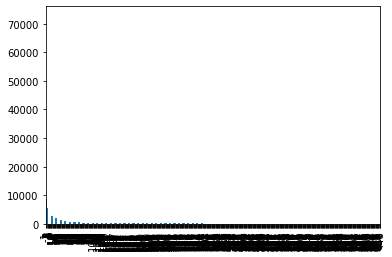

In [50]:
for (columnName, columnData) in movie_df.mask(movie_df == -1).iteritems():
    if movie_df[columnName].dtypes in [np.int32, np.int64, np.float64]:
        print(columnName)
        movie_df[columnName].value_counts().plot.bar()



### Ratings


## Data Pre-processing 